In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn
seaborn.set()

In [3]:
raw_data = pd.read_csv("1.03. Dummies.csv")

#### The categorical variable here is referred to as a dummy variable

In [4]:
raw_data

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No
...,...,...,...
79,1936,3.71,Yes
80,1810,3.71,Yes
81,1987,3.73,No
82,1962,3.76,Yes


In [5]:
data = raw_data.copy()

In [6]:
data['Attendance'] = data['Attendance'].map({"Yes":1,"No":0}) #We mao a numeric value to the dummy variables

In [7]:
data

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0
...,...,...,...
79,1936,3.71,1
80,1810,3.71,1
81,1987,3.73,0
82,1962,3.76,1


In [8]:
data.describe()

,SAT,GPA,Attendance
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,0.464286
std,104.530661,0.271617,0.501718
min,1634.000000,2.400000,0.000000
25%,1772.000000,3.190000,0.000000
50%,1846.000000,3.380000,0.000000
75%,1934.000000,3.502500,1.000000
max,2050.000000,3.810000,1.000000


In [9]:
y = data['GPA']
x1 = data[['SAT','Attendance']]

In [10]:
x = sm.add_constant(x1)
result = sm.OLS(y,x).fit()
result.summary()

/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Sat, 16 Nov 2019   Prob (F-statistic):           2.19e-15
Time:                        19:11:36   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### The following observations are considered in this model from the previous simple regression model
1. The Adjusted R-squared value is higher than that of the previous model
2. The p-value shows that the result us sgnificant

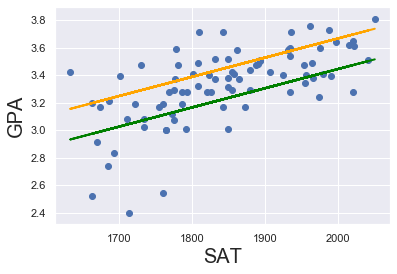

In [11]:
plt.scatter(data['SAT'],y) #Plotting both equations, for those with attendance and those without

yhat_no = 0.6439 + 0.0014 * data['SAT']
yhat_yes = 0.8665 + 0.0014 * data['SAT']

fig1 = plt.plot(data['SAT'], yhat_no, linewidth = 2, color = "green", label = "regression line")
fig2 = plt.plot(data['SAT'], yhat_yes, linewidth = 2, color = "orange", label = "regression line")

plt.xlabel('SAT',fontsize=20)
plt.ylabel('GPA',fontsize=20)
plt.show()

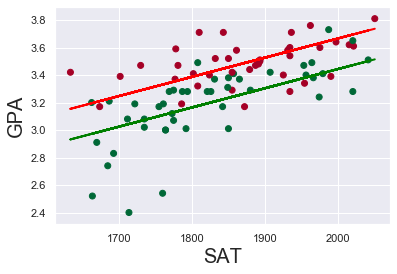

In [12]:
plt.scatter(data['SAT'],y, c = data['Attendance'], cmap = "RdYlGn_r") 

"""The color coding allows us to easily distinguish how students with over 75% attendance performed more
than students with less than 75% attendance"""
                    

yhat_no = 0.6439 + 0.0014 * data['SAT']
yhat_yes = 0.8665 + 0.0014 * data['SAT']

fig1 = plt.plot(data['SAT'], yhat_no, linewidth = 2, color = "green", label = "regression line")
fig2 = plt.plot(data['SAT'], yhat_yes, linewidth = 2, color = "red", label = "regression line")

plt.xlabel('SAT',fontsize=20)
plt.ylabel('GPA',fontsize=20)
plt.show()

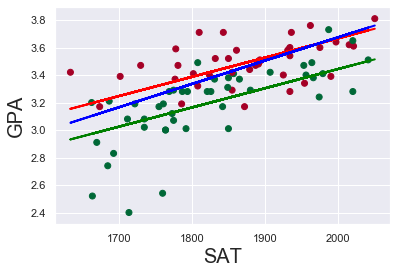

In [13]:
plt.scatter(data['SAT'],y, c = data['Attendance'], cmap = "RdYlGn_r")

yhat_no = 0.6439 + 0.0014 * data['SAT']
yhat_yes = 0.8665 + 0.0014 * data['SAT']
yhat = 0.275 + 0.0017 * data['SAT']

fig1 = plt.plot(data['SAT'], yhat_no, linewidth = 2, color = "green", label = "regression line")
fig2 = plt.plot(data['SAT'], yhat_yes, linewidth = 2, color = "red", label = "regression line")
fig3 = plt.plot(data['SAT'], yhat, linewidth = 2, color = "blue", label = "regression line")

plt.xlabel('SAT',fontsize=20)
plt.ylabel('GPA',fontsize=20)
plt.show()

#### What we need to run a prediction using this model is to plug in values for SAT and attendance